In [1]:
##
##
##Imports below
##

In [36]:
import os
from os import listdir
from os.path import isfile, join
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Auxilary Functions
## retrieveAllImages()

***Summary:***

* Returns a list of all the files in a directory, our usage will simply be to retrieve the images

***Parameters:***
                    
* directory (str): Name of the directory being loaded into a list, the default is './garbage bins'

***Returns:***
                    
* fileNames (str[]): list of all the filenames in the directory passed or defaulted value

## returnImageArray()

***Summary:***

* Returns a list of all the files in a directory, our usage will simply be to retrieve the images

***Parameters:***
                    
* filename (str): Name of the file being located
                    
* directory (str): Name of the directory being loaded into a list, the default is './garbage bins'

***Returns:***
                    
* fileNames (str[]): list of all the filenames in the directory passed or defaulted value

## processImageFeatures()

***Summary:***

* Returns a list of the image's features, it tries to flatten the information into a single array instead of multiple 

***Parameters:***
                    
* image (np.array): We feed in the array that we generate using returnImageArray()

***Returns:***
                    
* flatify (np.hstack): gives us the single dimension list describing the image in grayscale

## getHOG()

***Summary:***

* Returns a histogram of gradient directions that can be previewed in jupyter

***Parameters:***
                    
* image (np.array): We feed in the array that we generate using returnImageArray()

***Returns:***
                    
* grayHOG (skimage.feature.hog): Returns the HOG describing the image, it specifically returns a multi-dimensional array

In [49]:
def retrieveAllImages(directory = "./garbage bins"): 
    fileNames = [f for f in listdir(directory) if isfile(join(directory, f))]
    return fileNames

def returnImageArray(filename, directory = "./garbage bins/"):
    filePath = os.path.join(directory, filename)
    image = Image.open(filePath)
    return np.array(image)

def processImageFeatures(image):
    features = image.flatten()
    grayscaleConversion = rgb2gray(rgba2rgb(image))
    hogify = hog(grayscaleConversion, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    flatify = np.hstack(features)
    return flatify

def getHOG(image):
    grayscaleConversion = rgb2gray(rgba2rgb(image))
    features, grayHOG = hog(grayscaleConversion,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))
    return grayHOG
    


In [50]:
##Retrieving all of the image filenames
##
##
##

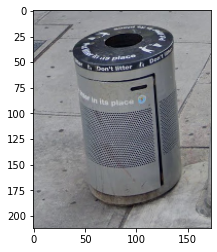

[151 152 157 ... 144 149 255]


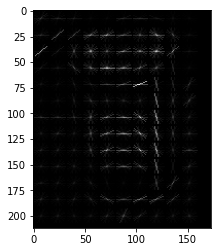

In [53]:
fileNames = retrieveAllImages()
test = returnImageArray(fileNames[30])
plt.imshow(test)
plt.show()

hogRow = processImageFeatures(test)
hogImage = getHOG(test)

print(hogRow)
plt.imshow(hogImage, cmap=mpl.cm.gray)